# La Pure DP : $\varepsilon$

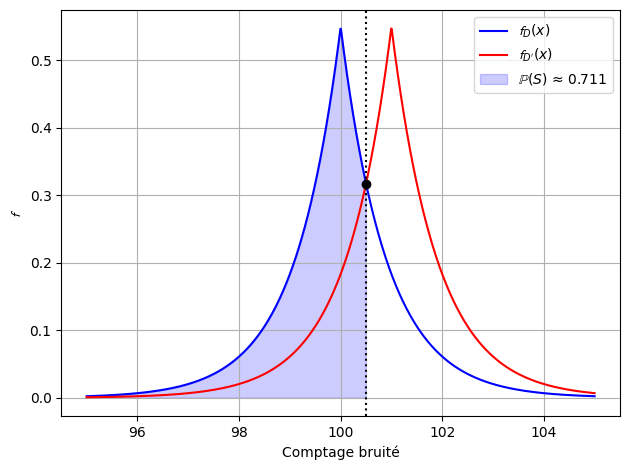

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import laplace

# Paramètres
mu1, mu2 = 100, 101
b = 1 / np.log(3)

# Axe des x
x = np.linspace(95, 105, 1000)

# Densités
y1 = laplace.pdf(x, loc=mu1, scale=b)
y2 = laplace.pdf(x, loc=mu2, scale=b)

# Point limite pour l’aire
x_limit = 100.5
idx_limit = np.where(x <= x_limit)

# Tracé des courbes
plt.plot(x, y1, label=r"$\mathcal{f}_D(x)$", color='blue')
plt.plot(x, y2, label=r"$\mathcal{f}_{D'}(x)$", color='red')

# Remplissage de l’aire sous la courbe bleue jusqu’à 100.5
plt.fill_between(x[idx_limit], y1[idx_limit], color='blue', alpha=0.2, label=r"$\mathbb{P}(S)$ ≈ 0.711")

# Tracer les lignes pointillées
plt.plot(x_limit, laplace.pdf(x_limit, loc=mu1, scale=b), 'o', color='black')
plt.axvline(x=x_limit, linestyle='dotted', color='black')

# Mise en forme
plt.xlabel("Comptage bruité")
plt.ylabel(r"$\mathcal{f}$")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

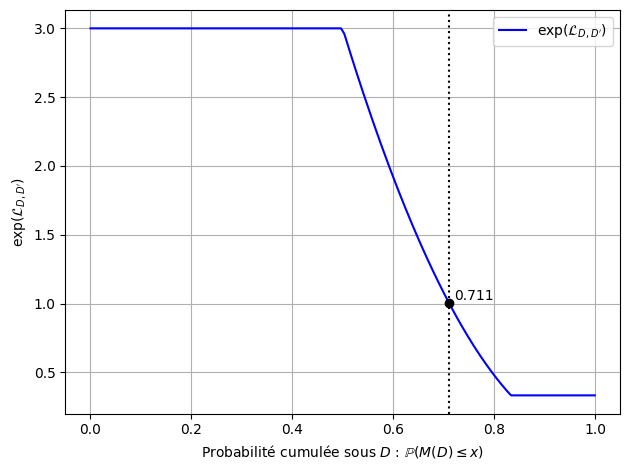

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import laplace

# Paramètres
mu1, mu2 = 100, 101
b = 1 / np.log(3)

# Axe des x (comptages bruités)
x = np.linspace(94, 106, 1000)

# Densités
y1 = laplace.pdf(x, loc=mu1, scale=b)  # P(M(D) = x)
y2 = laplace.pdf(x, loc=mu2, scale=b)  # P(M(D') = x)

# Densité cumulée sous D
cdf_y1 = laplace.cdf(x, loc=mu1, scale=b)  # P(M(D) ≤ x)

# Calcul de l'exponentielle de la perte de confidentialité
ratio = y1 / y2  # = exp(𝓛)

# Trouver le point où exp(𝓛) est le plus proche de 0 (le plus petit)
idx_min = np.argmin(np.abs(ratio -1))
x_min = x[idx_min]
cdf_min = cdf_y1[idx_min]
y_min = ratio[idx_min]

# Tracé
plt.plot(cdf_y1, ratio, color='blue', label=r"$\exp(\mathcal{L}_{D, D'})$")

# Ligne pointillée verticale depuis l’axe des x
plt.axvline(x=cdf_min, linestyle='dotted', color='black')
plt.plot(cdf_min, y_min, 'o', color='black')
plt.text(cdf_min + 0.01, y_min, f"{cdf_min:.3f}", verticalalignment='bottom', color='black')

# Mise en forme
plt.xlabel(r"Probabilité cumulée sous $D$ : $\mathbb{P}(M(D) \leq x)$")
plt.ylabel(r"$\exp(\mathcal{L}_{D, D'})$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# L'Approximate DP : ($\varepsilon, \delta$)

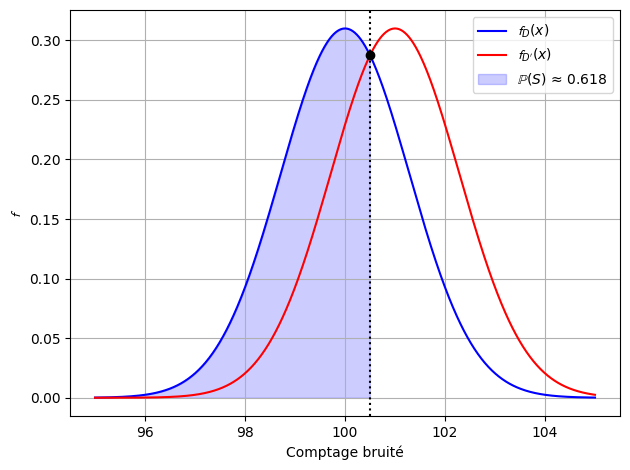

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Paramètres
mu1, mu2 = 100, 101
b = np.sqrt(2) / np.log(3)

# Axe des x
x = np.linspace(95, 105, 1000)

# Densités
y1 = norm.pdf(x, loc=mu1, scale=b)
y2 = norm.pdf(x, loc=mu2, scale=b)

# Point limite pour l’aire
x_limit = 100.5
idx_limit = np.where(x <= x_limit)

# Tracé des courbes
plt.plot(x, y1, label=r"$\mathcal{f}_D(x)$", color='blue')
plt.plot(x, y2, label=r"$\mathcal{f}_{D'}(x)$", color='red')

# Remplissage de l’aire sous la courbe bleue jusqu’à 100.5
plt.fill_between(x[idx_limit], y1[idx_limit], color='blue', alpha=0.2, label=r"$\mathbb{P}(S)$ ≈ 0.618")

# Tracer les lignes pointillées
plt.plot(x_limit, norm.pdf(x_limit, loc=mu1, scale=b), 'o', color='black')
plt.axvline(x=x_limit, linestyle='dotted', color='black')

# Mise en forme
plt.xlabel("Comptage bruité")
plt.ylabel(r"$\mathcal{f}$")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

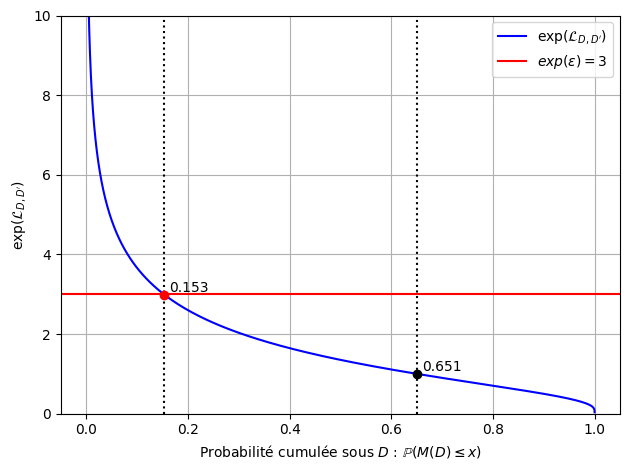

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Paramètres
mu1, mu2 = 100, 101
b = np.sqrt(2) / np.log(3)

# Axe des x (comptages bruités)
x = np.linspace(94, 106, 1000)

# Densités
y1 = norm.pdf(x, loc=mu1, scale=b)  # P(M(D) = x)
y2 = norm.pdf(x, loc=mu2, scale=b)  # P(M(D') = x)

# Densité cumulée sous D
cdf_y1 = norm.cdf(x, loc=mu1, scale=b)  # P(M(D) ≤ x)

# Calcul de l'exponentielle de la perte de confidentialité
ratio = y1 / y2  # = exp(𝓛)

# Trouver le point où exp(𝓛) est le plus proche de 0 (le plus petit)
idx_min = np.argmin(np.abs(ratio -1))
x_min = x[idx_min]
cdf_min = cdf_y1[idx_min]
y_min = ratio[idx_min]

idx_min_2 = np.argmin(np.abs(ratio -3))
x_min_2 = x[idx_min_2]
cdf_min_2 = cdf_y1[idx_min_2]
y_min_2 = ratio[idx_min_2]

# Tracé
plt.plot(cdf_y1, ratio, color='blue', label=r"$\exp(\mathcal{L}_{D, D'})$")

# Ligne pointillée verticale depuis l’axe des x
plt.axvline(x=cdf_min, linestyle='dotted', color='black')
plt.plot(cdf_min, y_min, 'o', color='black')
plt.text(cdf_min + 0.01, y_min, f"{cdf_min:.3f}", verticalalignment='bottom', color='black')

plt.axhline(y=3, color='red', label=r"$exp(\varepsilon) = 3$")

plt.axvline(x=cdf_min_2, linestyle='dotted', color='black')
plt.plot(cdf_min_2, y_min_2, 'o', color='red')
plt.text(cdf_min_2 + 0.01, y_min_2, f"{cdf_min_2:.3f}", verticalalignment='bottom', color='black')

# Mise en forme
plt.xlabel(r"Probabilité cumulée sous $D$ : $\mathbb{P}(M(D) \leq x)$")
plt.ylabel(r"$\exp(\mathcal{L}_{D, D'})$")
plt.ylim(0,10)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


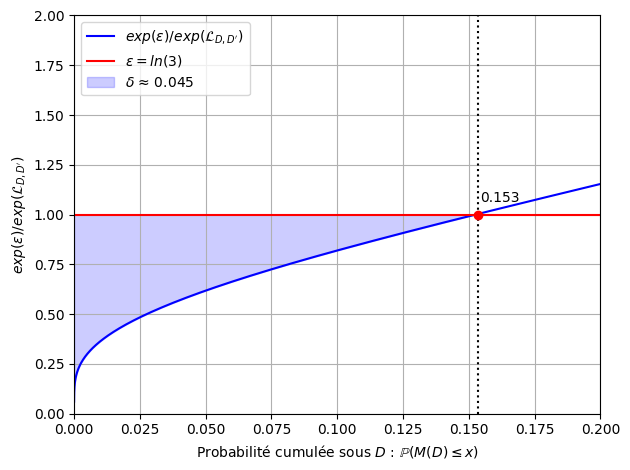

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Paramètres
mu1, mu2 = 100, 101
b = np.sqrt(2) / np.log(3)

# Axe des x (comptages bruités)
x = np.linspace(94, 106, 1000)

# Densités
y1 = norm.pdf(x, loc=mu1, scale=b)  # P(M(D) = x)
y2 = norm.pdf(x, loc=mu2, scale=b)  # P(M(D') = x)

# Densité cumulée sous D
cdf_y1 = norm.cdf(x, loc=mu1, scale=b)  # P(M(D) ≤ x)

# Calcul de l'exponentielle de la perte de confidentialité
ratio = y1 / y2  # = exp(𝓛)

idx_min_2 = np.argmin(np.abs(ratio -3))
x_min_2 = x[idx_min_2]
cdf_min_2 = cdf_y1[idx_min_2]
y_min_2 = ratio[idx_min_2]

# Tracé
plt.plot(cdf_y1, 3/ratio, color='blue', label=r"$exp(\varepsilon)/exp(\mathcal{L}_{D, D'})$")

plt.axhline(y=1, color='red', label=r"$\varepsilon = ln(3)$")
plt.axvline(x=cdf_min_2, linestyle='dotted', color='black')
plt.plot(cdf_min_2, 1, 'o', color='red')
plt.text(cdf_min_2 + 0.001, 1+0.05, f"{cdf_min_2:.3f}", verticalalignment='bottom', color='black')

area = np.trapz(1 - 3/ratio[:idx_min_2], cdf_y1[:idx_min_2])

# Remplissage de l’aire sous la courbe bleue jusqu’à 100.5
plt.fill_between(cdf_y1[1:idx_min_2], y1= 3/ratio[1:idx_min_2], y2= 1, color='blue', alpha=0.2, label=rf"$\delta$ ≈ {area:.3f}")

# Mise en forme
plt.xlabel(r"Probabilité cumulée sous $D$ : $\mathbb{P}(M(D) \leq x)$")
plt.ylabel(r"$exp(\varepsilon)/exp(\mathcal{L}_{D, D'})$")
plt.xlim(0,0.2)
plt.ylim(0,2)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#  De la zero Concentrated DP $\rho$ -> ($\varepsilon, \delta$) -DP

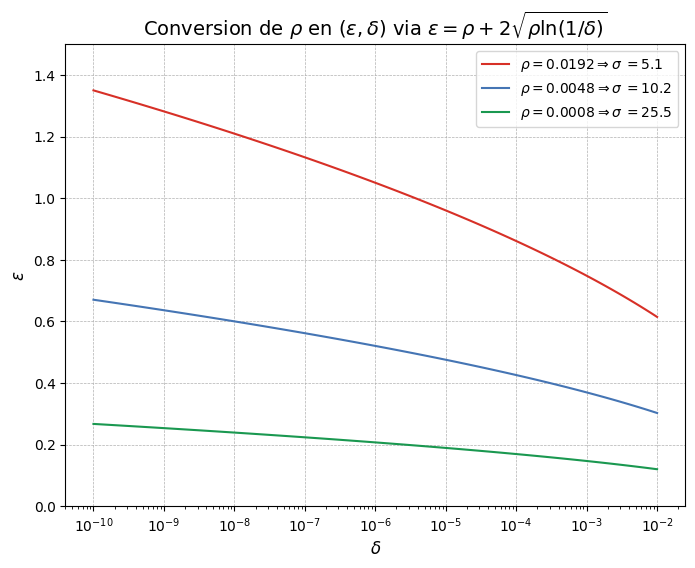

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Plage de valeurs pour delta (échelle logarithmique)
delta_values = np.logspace(-10, -2, 100)
sigma = np.array([5.1, 10.2, 25.5])

colors = {
    5.1: "#d73027",     # rouge
    10.2: "#4575b4",    # bleu
    25.5: "#1a9850",    # vert
}

# Calcul de rho en fonction de sigma
rho = 1 / (2 * sigma**2)

# Création du graphique
plt.figure(figsize=(8, 6))
for k in range(len(sigma)):
    # Calcul de epsilon avec la formule avancée
    epsilon_values = rho[k] + np.sqrt(4 * rho[k] * np.log(1 / delta_values))

    plt.plot(delta_values, epsilon_values, color=colors[sigma[k]], label=rf'$\rho = {rho[k]:.4f} \Rightarrow \sigma_ = {sigma[k]:.1f}$')

# Personnalisation du graphique
plt.xscale("log")
plt.ylim(0, 1.5)
plt.xlabel(r'$\delta$', fontsize=12)
plt.ylabel(r'$\varepsilon$', fontsize=12)
plt.title(r'Conversion de $\rho$ en ($\varepsilon, \delta$) via $\varepsilon = \rho + 2\sqrt{\rho \ln(1/\delta)}$', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)

# Affichage du graphique
plt.show()

## Trouver $\rho$ à partir d'($\varepsilon, \delta$)

In [93]:
import numpy as np
delta = 1e-6
eps = 0.2

rho_m = 2*np.log(1/delta) + eps - 2*np.sqrt(np.log(1/delta)*(np.log(1/delta) + eps))
rho_p = 2*np.log(1/delta) + eps + 2*np.sqrt(np.log(1/delta)*(np.log(1/delta) + eps))
print(rho_m)
print(rho_p)

rho_test = rho_m
eps_test = rho_test + 2*np.sqrt(rho_test*np.log(1/delta))
print(eps_test)

0.0007186318508622946
55.66132360000623
0.20000000000029508


# Bruit Laplacien

Il y a une perte en terme de précision (sigma) en passant en approximate DP via l'intermédiaire de la zCDP.
Même en cas de composition, en voulant un même niveau de précision, le budget dépensé resterait colossalement plus grand que via la composition du laplacien de base.
Dépensé artificiellement du delta n'offre aucun avantage.

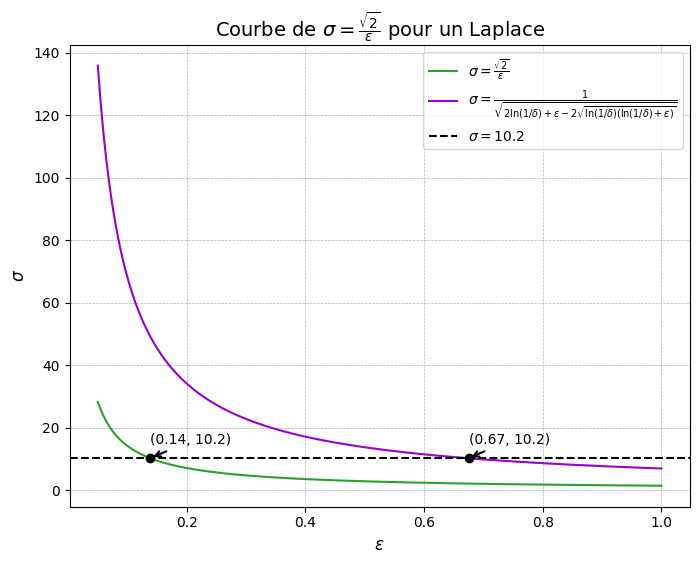

In [96]:
from scipy.optimize import root_scalar

# Plage de valeurs pour epsilon
eps = np.linspace(0.05, 1, 200)
delta = 1e-5
sigma_target = 10.2

colors = {
    "laplace": "#2ca02c",      # vert
    "zcdp": "#9900cc",    # violet
}

sigma = np.sqrt(2) / eps
sigma_zcdp = 1/ np.sqrt(2*np.log(1/delta) + eps - 2*np.sqrt(np.log(1/delta)*(np.log(1/delta) + eps)))

eps_target = np.sqrt(2) / sigma_target

# Fonction à annuler : f(eps) = sigma_zcdp(eps) - sigma_target
def f(eps):
    sigma_zcdp = 1/ np.sqrt(2*np.log(1/delta) + eps - 2*np.sqrt(np.log(1/delta)*(np.log(1/delta) + eps)))
    return sigma_zcdp - sigma_target

# Résolution numérique
result = root_scalar(f, bracket=[0.01, 100], method='brentq')
eps_target_zcdp = result.root if result.converged else None

# Création du graphique
plt.figure(figsize=(8, 6))
plt.plot(eps, sigma, label=r'$\sigma = \frac{\sqrt{2}}{\varepsilon}$', color=colors["laplace"])
plt.plot(eps, sigma_zcdp, label=r'$\sigma = \frac{1}{\sqrt{2\ln(1/\delta) + \varepsilon - 2\sqrt{\ln(1/\delta)(\ln(1/\delta) + \varepsilon)}}}$', color=colors["zcdp"])

# Ajout d'une ligne horizontale pour sigma_target
plt.axhline(y=sigma_target, color='black', linestyle='--', label=rf'$\sigma = {sigma_target:.1f}$')

# Mise en évidence des points correspondants sur la courbe
plt.scatter(eps_target, sigma_target, color='black', zorder=3)
plt.annotate(
    f'({eps_target:.2f}, {sigma_target})', 
    xy=(eps_target, sigma_target),
    xytext=(0,10), textcoords='offset points',
    arrowprops=dict(arrowstyle="->", lw=1.5),
    fontsize=10, color='black'
)

plt.scatter(eps_target_zcdp, sigma_target, color='black', zorder=3)
plt.annotate(
    f'({eps_target_zcdp:.2f}, {sigma_target})', 
    xy=(eps_target_zcdp, sigma_target),
    xytext=(0,10), textcoords='offset points',
    arrowprops=dict(arrowstyle="->", lw=1.5),
    fontsize=10, color='black'
)

# Personnalisation du graphique
plt.xlabel(r'$\varepsilon$', fontsize=12)
plt.ylabel(r'$\sigma$', fontsize=12)
plt.title(r'Courbe de $\sigma = \frac{\sqrt{2}}{\varepsilon}$ pour un Laplace', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)

# Affichage du graphique
plt.show()

# Comparaison bruit gaussien / bruit laplacien

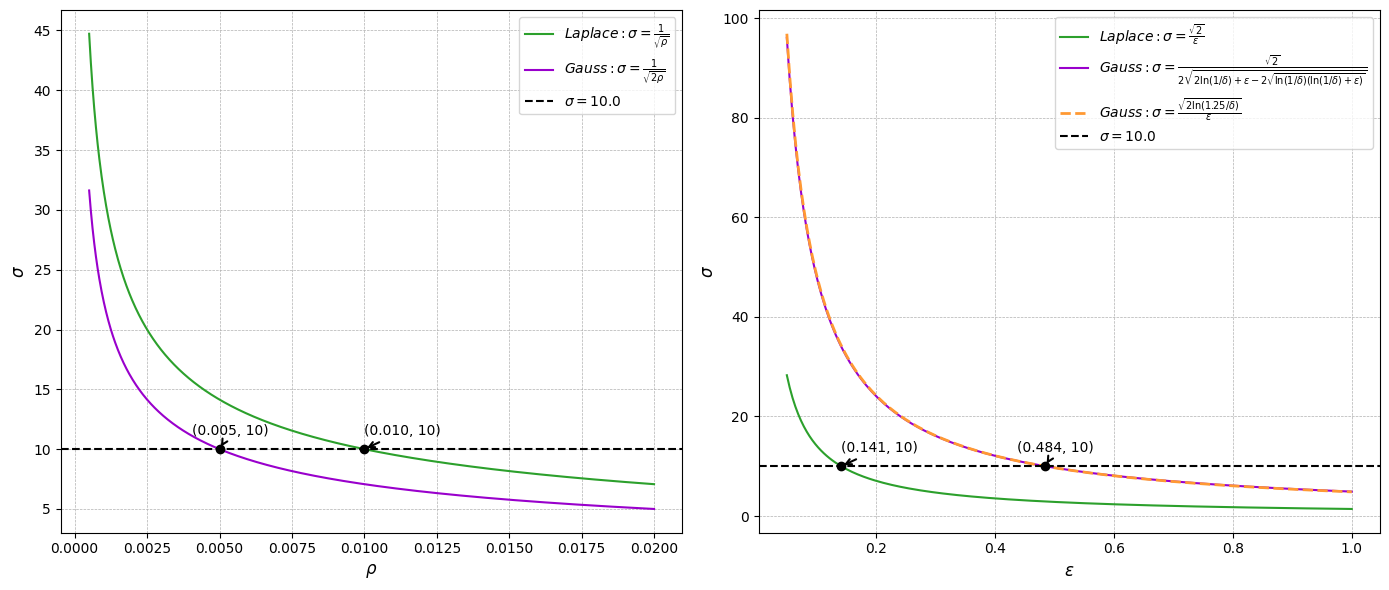

In [100]:
from scipy.optimize import root_scalar

# Plage de valeurs pour epsilon
rho = np.linspace(0.0005, 0.02, 1000)
eps = np.linspace(0.05, 1, 200)
delta = 1e-5
sigma_target = 10

colors = {
    "laplace": "#2ca02c",       # vert
    "gauss": "#ff9933",         # orange
    "zcdp": "#9900cc",    # violet
}

# Calcul des valeurs de sigma
sigma_laplace_rho = 1 / np.sqrt(rho)
sigma_gauss_zcdp = 1 / np.sqrt(2*rho)


rho_target_laplace = 1 / sigma_target**2
rho_target_gauss = 1 / (2* sigma_target**2)


sigma_laplace_eps = np.sqrt(2) / eps
sigma_gauss_eps = np.sqrt(2*np.log(1.25/delta)) / eps
sigma_gauss_zcdp_eps = 1/ (np.sqrt(2)*np.sqrt(2*np.log(1/delta) + eps - 2*np.sqrt(np.log(1/delta)*(np.log(1/delta) + eps))))


eps_target_laplace = np.sqrt(2) / sigma_target
eps_target_gauss = np.sqrt(2*np.log(1.25/delta)) / sigma_target

# Création du graphique
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.plot(rho, sigma_laplace_rho, label=r'$ Laplace : \sigma = \frac{1}{\sqrt{\rho}}$', color=colors["laplace"])
ax1.plot(rho, sigma_gauss_zcdp, label=r'$ Gauss : \sigma = \frac{1}{\sqrt{2\rho}}$', color=colors["zcdp"])

# Ajout d'une ligne horizontale pour sigma = 10
ax1.axhline(y=sigma_target, color='black', linestyle='--', label=rf'$\sigma = {sigma_target:.1f}$')

# Mise en évidence du point correspondant sur la courbe
ax1.scatter(rho_target_laplace, sigma_target, color='black', zorder=3)
ax1.annotate(
    f'({rho_target_laplace:.3f}, {sigma_target})', 
    xy=(rho_target_laplace, sigma_target),
    xytext=(0,10), textcoords='offset points',
    arrowprops=dict(arrowstyle="->", lw=1.5),
    fontsize=10, color='black'
)

ax1.scatter(rho_target_gauss, sigma_target, color='black', zorder=3)
ax1.annotate(
    f'({rho_target_gauss:.3f}, {sigma_target})', 
    xy=(rho_target_gauss, sigma_target),
    xytext=(-20,10), textcoords='offset points',
    arrowprops=dict(arrowstyle="->", lw=1.5),
    fontsize=10, color='black'
)

# Personnalisation du graphique
ax1.set_xlabel(r'$\rho$', fontsize=12)
ax1.set_ylabel(r'$\sigma$', fontsize=12)
ax1.legend()
ax1.grid(True, linestyle='--', linewidth=0.5)

ax2.plot(eps, sigma_laplace_eps, label=r'$ Laplace : \sigma = \frac{\sqrt{2}}{\varepsilon}$', color=colors["laplace"])
ax2.plot(eps, sigma_gauss_zcdp_eps, color=colors["zcdp"],
    label=r'$ Gauss : \sigma = \frac{\sqrt{2}}{2\sqrt{2\ln(1/\delta) + \varepsilon - 2\sqrt{\ln(1/\delta)(\ln(1/\delta) + \varepsilon)}}}$')
ax2.plot(eps, sigma_gauss_eps, color=colors["gauss"],linestyle='--', linewidth=2,
    label=r'$ Gauss : \sigma = \frac{\sqrt{2\ln(1.25/\delta)}}{\varepsilon}$')

# Ajout d'une ligne horizontale pour sigma_target
ax2.axhline(y=sigma_target, color='black', linestyle='--', label=rf'$\sigma = {sigma_target:.1f}$')

# Mise en évidence du point correspondant sur la courbe
ax2.scatter(eps_target_laplace, sigma_target, color='black', zorder=3)
ax2.annotate(
    f'({eps_target_laplace:.3f}, {sigma_target})', 
    xy=(eps_target_laplace, sigma_target),
    xytext=(0,10), textcoords='offset points',
    arrowprops=dict(arrowstyle="->", lw=1.5),
    fontsize=10, color='black'
)

ax2.scatter(eps_target_gauss, sigma_target, color='black', zorder=3)
ax2.annotate(
    f'({eps_target_gauss:.3f}, {sigma_target})', 
    xy=(eps_target_gauss, sigma_target),
    xytext=(-20,10), textcoords='offset points',
    arrowprops=dict(arrowstyle="->", lw=1.5),
    fontsize=10, color='black'
)

ax2.set_xlabel(r'$\varepsilon$', fontsize=12)
ax2.set_ylabel(r'$\sigma$', fontsize=12)
ax2.legend()
ax2.grid(True, linestyle='--', linewidth=0.5)

# Affichage du graphique
plt.tight_layout()
plt.show()

# Valeurs de l'intervalle de confiance pour différentes valeurs de $\sigma$

In [27]:
from scipy.stats import norm, laplace
import numpy as np

# Paramètres de la loi normale
mu = 0  # Espérance nulle
sigma_values = [5.1, 10.2, 25.5]

for sigma in sigma_values:
    # Calcul des bornes de l'intervalle de confiance à 95%
    lower_bound, upper_bound = norm.ppf([0.025, 0.975], mu, sigma)
    
    # Calcul de la taille de l'intervalle
    interval_size = upper_bound - lower_bound
    print(f"Taille de l'intervalle de confiance à 95% pour Gauss avec sigma = {sigma}: {interval_size}")

    # Paramètre b pour la loi de Laplace (b = sigma / sqrt(2))
    b = sigma / np.sqrt(2)
    
    # Calcul des bornes de l'intervalle de confiance à 95% pour la distribution Laplace
    lower_bound_laplace, upper_bound_laplace = laplace.ppf([0.025, 0.975], loc=mu, scale=b)
    
    # Calcul de la taille de l'intervalle de confiance
    interval_size_laplace = upper_bound_laplace - lower_bound_laplace
    print(f"Taille de l'intervalle de confiance à 95% pour Laplace avec sigma = {sigma}: {interval_size_laplace}")

Taille de l'intervalle de confiance à 95% pour Gauss avec sigma = 5.1: 19.991632642308552
Taille de l'intervalle de confiance à 95% pour Laplace avec sigma = 5.1: 21.60668657354408
Taille de l'intervalle de confiance à 95% pour Gauss avec sigma = 10.2: 39.983265284617104
Taille de l'intervalle de confiance à 95% pour Laplace avec sigma = 10.2: 43.21337314708816
Taille de l'intervalle de confiance à 95% pour Gauss avec sigma = 25.5: 99.95816321154277
Taille de l'intervalle de confiance à 95% pour Laplace avec sigma = 25.5: 108.03343286772042
